# This notebook reads ShapeFiles with Cartography maps from the US Census Bureau

References:

https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

https://www.kaggle.com/alexisbcook/proximity-analysis

Created on 2021-May-2 by Edwin Campos

Last modification on 2021-May-9 by ecampos.phd@gmail.com

## Global Variables

In [1]:
URL_CENSUS = 'https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_20m.zip'  # USA States at 1 : 20,000,000 scale (national)
LOCAL_SHAPES = r'getstateshape_shapes.zip'
TEMP_DIR = 'maps_temp'
N_POINTS = 100 # Number of random points within the US State

In [2]:
CASE = 2
TC_NAME = ['HANNA', 'ETA', 'SALLY'][CASE]
TC_ID = ['al082020','al292020','al192020'][CASE] #al292020_best_track.zip

## Dependencies and Data Ingestion

In [3]:
#import geopandas
try:
  import geopandas
except:
  ! pip install geopandas
  import time
  time.sleep(10) # Sleep for 10 seconds to give pip a chance to finish installing geopandas
  import geopandas
#! pip install geopandas

In [4]:
import requests
downloaded_obj = requests.get(URL_CENSUS)
# Save the zip file in the local directory
with open(LOCAL_SHAPES, 'wb') as file:
    file.write(downloaded_obj.content)

In [5]:
from zipfile import ZipFile
with ZipFile(LOCAL_SHAPES, 'r') as zipObj:
   # Extract all the contents of zip file in directory 'temp'
   zipObj.extractall(TEMP_DIR)  

In [6]:
geodf = geopandas.read_file(TEMP_DIR)
geodf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,53,01779804,0400000US53,53,WA,Washington,00,172117954267,12549727444,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
1,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868701898,4922576715,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
2,46,01785534,0400000US46,46,SD,South Dakota,00,196346195316,3383460688,"POLYGON ((-104.05770 44.99743, -104.03914 44.9..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105823701267,10274036690,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131174192284,4593183334,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
5,05,00068085,0400000US05,05,AR,Arkansas,00,134776580080,2956395922,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
6,35,00897535,0400000US35,35,NM,New Mexico,00,314197253999,727781442,"POLYGON ((-109.04919 31.79655, -109.04830 32.0..."
7,48,01779801,0400000US48,48,TX,Texas,00,676668210823,18991880422,"POLYGON ((-106.62345 31.91403, -106.63011 31.9..."
8,06,01779778,0400000US06,06,CA,California,00,403660088482,20305454540,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
9,21,01779786,0400000US21,21,KY,Kentucky,00,102282218059,2372611005,"POLYGON ((-89.54443 36.57451, -89.47935 36.566..."


In [7]:
# Subsets the GeoDataFrame
florida = geodf[geodf['NAME'] == 'Florida']

Text(0.5, 1.0, 'Map of Florida\n Original Coordinate Reference System')

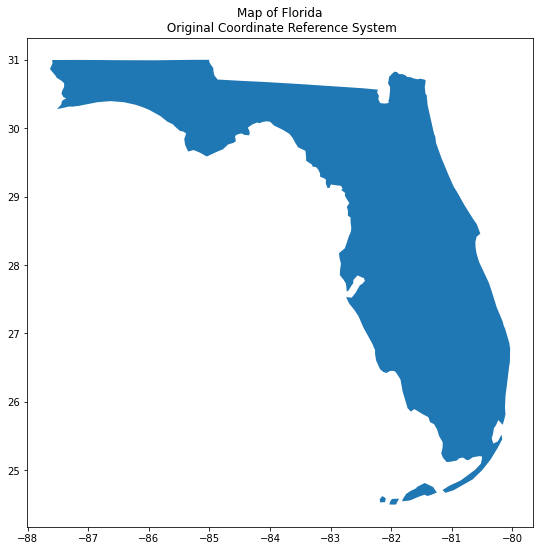

In [8]:
# Visualize map in Lat Lon coordinates
import matplotlib.pyplot as plt

ax = florida.plot(figsize=(12,9))#ax=ax)
ax.set_title("Map of Florida\n Original Coordinate Reference System")

## Convert to Lat, Lon coordinates

In [9]:
# Coordinate Reference Systems
print( florida.crs, type(geodf.crs) ) 

epsg:4269 <class 'pyproj.crs.crs.CRS'>


In [10]:
# Convert geometries into Latitude and Longitude
florida_geo = florida.to_crs(epsg=4269)
print('\n','LAT,LON PROJECTED:')
print(florida_geo)


 LAT,LON PROJECTED:
   STATEFP   STATENS     AFFGEOID GEOID STUSPS     NAME LSAD         ALAND  \
20      12  00294478  0400000US12    12     FL  Florida   00  138947364717   

         AWATER                                           geometry  
20  31362872853  MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...  


Text(0.5, 1.0, 'Map of Florida\n Lat,Lon Coordinate Reference System')

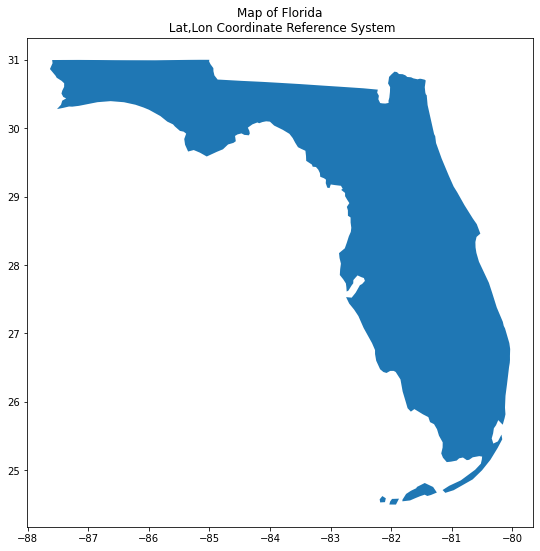

In [11]:
# Visualize map in Lat Lon coordinates
#import matplotlib.pyplot as plt

ax = florida_geo.plot(figsize=(12,9))#ax=ax)
ax.set_title("Map of Florida\n Lat,Lon Coordinate Reference System")

## Generate random points within a Shape
References: 
https://gis.stackexchange.com/questions/294394/randomly-sample-from-geopandas-dataframe-in-python
https://gis.stackexchange.com/a/207740/29431

In [12]:
from shapely.geometry import Point
import geopandas as gpd
import random

In [13]:
def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point

In [14]:
#geodata = gpd.read_file("path/to/your/file.shp")

# generate 50 points within the first county polygon in geodata
#points = random_points_in_polygon(50, geodata.iloc[0].geometry)

# Generate N_POINTS points within the first county polygon in geodata
points = random_points_in_polygon(N_POINTS, florida.iloc[0].geometry)

# Coordinates of the first point
# print(points[0].x, points[0].y)

# print coordinates of all points
for i, point in enumerate(points):
    print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

Point 1: (-87.19423089480075,30.970006871758375)
Point 2: (-80.83619389227397,26.69304454091445)
Point 3: (-81.93498012759127,27.897606349931596)
Point 4: (-81.17906846263003,26.484402859628958)
Point 5: (-81.92211390284429,24.575456898890664)
Point 6: (-82.22444641588343,28.49491962806573)
Point 7: (-81.37180518516188,29.195079188989034)
Point 8: (-82.00911020387228,28.532994357974168)
Point 9: (-83.8129443384693,30.567334413669002)
Point 10: (-82.299705138453,29.784826244495452)
Point 11: (-81.54615351280084,28.398345605298164)
Point 12: (-81.46697805465966,30.147790367007453)
Point 13: (-80.93789245401373,25.289703999134066)
Point 14: (-84.95438526309009,29.779458732840137)
Point 15: (-85.35771551540337,29.83534303804761)
Point 16: (-80.24466156144763,26.11535600994516)
Point 17: (-80.58683108175657,26.556512125427915)
Point 18: (-85.27933614586951,30.088762764708108)
Point 19: (-85.83790152585856,30.265446948134525)
Point 20: (-86.6924276166838,30.775195466039325)
Point 21: (-82.43

In [15]:
points

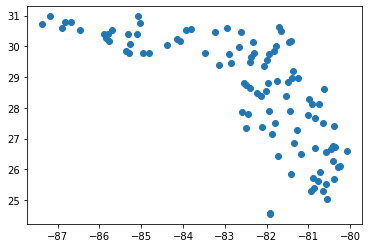

In [16]:
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)

Text(0.5, 60.0, 'Longitude (deg)')

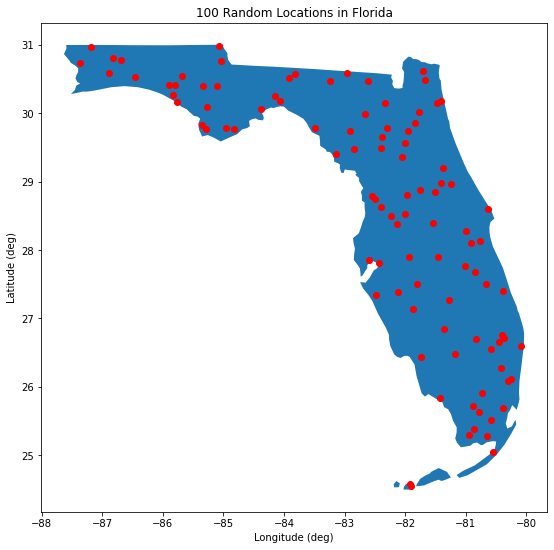

In [17]:
ax = florida.plot(figsize=(12,9))#ax=ax)
plt.scatter(xs, ys, color='red')
#points.plot(legend=True, color='red', ax=ax)
ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')

In [18]:
# Create a GeoPandas dataframe with the random points
random_points_gdf = gpd.GeoDataFrame({'geometry': points}, 
                                    crs='EPSG:4326')  # points are in a lon, lat coordinate system ==> EPSG:4326 or WGS 84

## Tropical Cyclone case


In [19]:
TC_STRING = 'Hurricane '+TC_NAME+', Atlantic 2020 Season'
URL_NHC_SHAPES = 'https://www.nhc.noaa.gov/gis/best_track/'+TC_ID+'_best_track.zip' 
LOCAL_SHAPES = r'local_shapes.zip'

Ingesting NOAA-NHC Data in the Shapefile ESRI format

In [20]:
import requests
downloaded_obj = requests.get(URL_NHC_SHAPES)
# Save the zip file in the local directory
with open(LOCAL_SHAPES, 'wb') as file:
    file.write(downloaded_obj.content)

In [21]:
from zipfile import ZipFile
with ZipFile(LOCAL_SHAPES, 'r') as zipObj:
   # Extract all the contents of zip file in directory 'temp'
   zipObj.extractall('temp')


In [22]:
import glob
nhc_pts_files_list = glob.glob('temp/*_pts.shp')
print(nhc_pts_files_list)

['temp/AL192020_pts.shp']


In [23]:
nhc_gdf = geopandas.read_file(nhc_pts_files_list[0])

In [24]:
print(nhc_gdf.columns)
nhc_gdf.tail(12)

Index(['STORMNAME', 'DTG', 'YEAR', 'MONTH', 'DAY', 'HHMM', 'MSLP', 'BASIN',
       'STORMNUM', 'STORMTYPE', 'INTENSITY', 'SS', 'LAT', 'LON', 'geometry'],
      dtype='object')


,STORMNAME,DTG,YEAR,MONTH,DAY,HHMM,MSLP,BASIN,STORMNUM,STORMTYPE,INTENSITY,SS,LAT,LON,geometry
15,SALLY,2.020092e+09,2020.0,09,15.0,1200,982.0,al,19.0,HU,70.0,1.0,29.0,-88.1,POINT (-88.10000 29.00000)
16,SALLY,2.020092e+09,2020.0,09,15.0,1800,981.0,al,19.0,HU,70.0,1.0,29.3,-88.1,POINT (-88.10000 29.30000)
17,SALLY,2.020092e+09,2020.0,09,16.0,0000,975.0,al,19.0,HU,75.0,1.0,29.6,-88.0,POINT (-88.00000 29.60000)
18,SALLY,2.020092e+09,2020.0,09,16.0,0600,967.0,al,19.0,HU,95.0,2.0,29.9,-87.9,POINT (-87.90000 29.90000)
19,SALLY,2.020092e+09,2020.0,09,16.0,1200,967.0,al,19.0,HU,85.0,2.0,30.5,-87.6,POINT (-87.60000 30.50000)
20,SALLY,2.020092e+09,2020.0,09,16.0,1800,982.0,al,19.0,TS,60.0,0.0,31.1,-87.2,POINT (-87.20000 31.10000)
21,SALLY,2.020092e+09,2020.0,09,17.0,0000,994.0,al,19.0,TS,35.0,0.0,31.6,-86.7,POINT (-86.70000 31.60000)
22,SALLY,2.020092e+09,2020.0,09,17.0,0600,1000.0,al,19.0,TD,30.0,0.0,32.1,-86.1,POINT (-86.10000 32.10000)
23,SALLY,2.020092e+09,2020.0,09,17.0,1200,1003.0,al,19.0,EX,30.0,0.0,32.6,-85.2,POINT (-85.20000 32.60000)
24,SALLY,2.020092e+09,2020.0,09,17.0,1800,1004.0,al,19.0,EX,30.0,0.0,33.2,-83.8,POINT (-83.80000 33.20000)


In [25]:
nhc_gdf.crs

<Geographic 2D CRS: EPSG:4035>
Name: Unknown datum based upon the Authalic Sphere
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree minute second hemisphere)
- Long[east]: Geodetic longitude (degree minute second hemisphere)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Authalic Sphere)
- Ellipsoid: Sphere
- Prime Meridian: Greenwich

Since CRS: EPSG:4535 is deprecated, we need to **change this CRS to 4047**

References: 

https://epsg.io/4035
https://epsg.io/4047

In [26]:
nhc_gdf = nhc_gdf.to_crs('EPSG:4047')

Text(0.5, 60.0, 'Longitude (deg)')

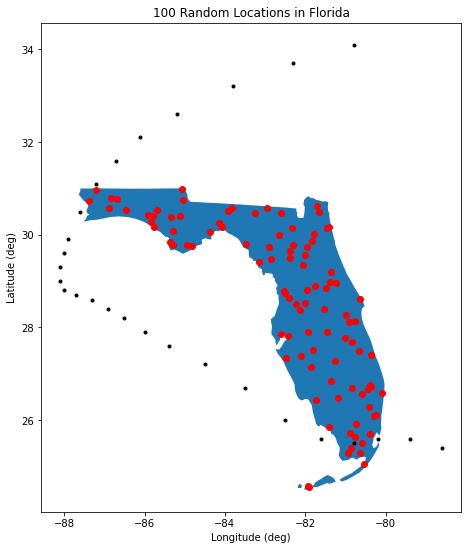

In [27]:
# Visualize data
ax = florida.plot(figsize=(12,9), zorder=0) # Remember that Florida uses crs: epsg=4269
#plt.scatter(xs, ys, color='red')
random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='red', ax=ax, zorder=1)  # Make sure to match to the CRS of the ax, i.e. florida geodataframe
nhc_gdf.to_crs(epsg=4269).plot(legend=True, color='black', marker='.',ax=ax, zorder=2) # # Make sure to match to the CRS of the ax, i.e. florida geodataframe
ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')

In [28]:
#from shapely.geometry import Point

# tc_name = 'ETA'
# tc_dtg = 2.020111e+09
# tc_YYYY = 2020.0
# tc_MM = 11
# tc_DD = 12.0
# tc_hhmm = 1200
# tc_mslp = 1001.0
# tc_basin = 'al'
# tc_number = 29.0
# tc_type = 'TS'
# tc_intensity = 40.0
# tc_ss = 0.0
# tc_lon = 29.8
# tc_lat = -82.4

#tc_pnt = Point(tc_lat, tc_lon)
## If points are in a lon, lat coordinate system ==> EPSG:4326 or WGS 84
#tc_point_gdf = gpd.GeoDataFrame({'geometry': [tc_pnt]}, crs='EPSG:4326')

## Measuring distance:
To measure distances between points from two different GeoDataFrames, we first have to make sure that they use the same coordinate reference system (CRS). Thankfully, this is the case here, where both use EPSG 2272.


Check the CRS to see which units it uses (meters, feet, or something else). 

In this case, EPSG 2272 has units of feet. (If you like, you can check this  [here](https://epsg.io/2272)

In [29]:
print(random_points_gdf.crs, type(random_points_gdf.crs))
print(florida.crs, type(florida.crs) ) # 4269
print(nhc_gdf.crs, type(nhc_gdf.crs))
#print(tc_point_gdf.crs, type(tc_point_gdf.crs))

EPSG:4326 <class 'pyproj.crs.crs.CRS'>
epsg:4269 <class 'pyproj.crs.crs.CRS'>
EPSG:4047 <class 'pyproj.crs.crs.CRS'>


In [30]:
# Convert the point to the same CRS, EPSG:2272, which uses units of feet
random_points_gdf = random_points_gdf.to_crs('EPSG:2272') 
nhc_gdf = nhc_gdf.to_crs('EPSG:2272')

In [31]:
print(random_points_gdf.crs)
print(florida.crs)
print(nhc_gdf.crs)

EPSG:2272
epsg:4269
EPSG:2272


In [32]:
# Select one release incident in particular
tc_point = nhc_gdf.iloc[0]

In [33]:
random_points_gdf

,geometry
0,POINT (-1024822.796 -2899060.539)
1,POINT (933251.539 -4627352.979)
2,POINT (586176.320 -4163730.675)
3,POINT (815264.362 -4701015.318)
4,POINT (531710.639 -5405772.982)
...,...
95,POINT (393861.581 -4358722.615)
96,POINT (535842.739 -5414310.249)
97,POINT (663240.153 -3800301.087)
98,POINT (387892.786 -3376341.391)


In [34]:
tc_point

STORMNAME                                        NINETEEN
DTG                                           2.02009e+09
YEAR                                                 2020
MONTH                                                  09
DAY                                                    11
HHMM                                                 1800
MSLP                                                 1007
BASIN                                                  al
STORMNUM                                               19
STORMTYPE                                              TD
INTENSITY                                              30
SS                                                      0
LAT                                                  25.4
LON                                                 -78.6
geometry     POINT (1678657.773534822 -5128240.982444993)
Name: 0, dtype: object

# Calculate the distance (in feet) between a relatively recent release incident in recent_release and every station in the stations GeoDataFrame.

**1 mile = 5280 feet**

In [35]:
# Select one particular position of the tropical cyclone
#tc_point_gdf = tc_points_all.iloc[3]

# Measure distance (in feet) from random points to hurricane position
distances_ft = random_points_gdf.geometry.distance(tc_point.geometry)
distances_miles = distances_ft/5280.0
distances_miles

0     663.637354
1     170.087910
2     276.008504
3     182.445449
4     223.493816
         ...    
95    283.639779
96    223.120355
97    316.605114
98    412.132111
99    226.654235
Length: 100, dtype: float64

## Creating a buffer
If we want to understand all points on a map that are some radius away from a point, the simplest way is to create a buffer.

The code cell below creates a GeoSeries twenty_mile_buffer containing 12 different Polygon objects. Each polygon is a buffer of 20 miles (or, 20*5280 feet) around a different random points.

In [36]:
twenty_mile_buffer = random_points_gdf.geometry.buffer(20*5280)
twenty_mile_buffer.head()

0    POLYGON ((-919222.796 -2899060.539, -919731.28...
1    POLYGON ((1038851.539 -4627352.979, 1038343.04...
2    POLYGON ((691776.320 -4163730.675, 691267.827 ...
3    POLYGON ((920864.362 -4701015.318, 920355.869 ...
4    POLYGON ((637310.639 -5405772.982, 636802.146 ...
dtype: geometry

(-89.0, -79.0)

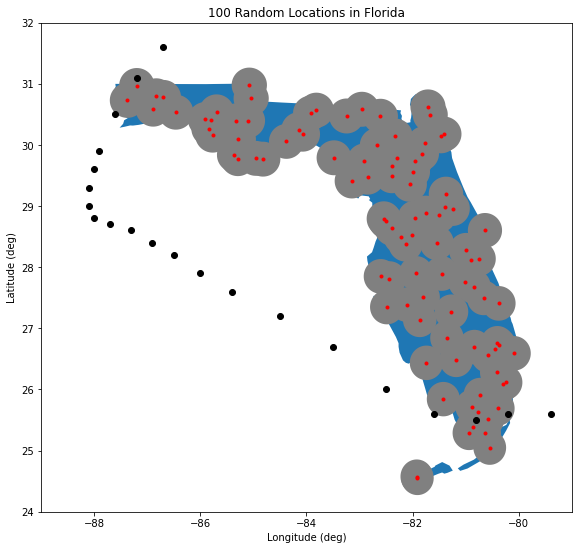

In [37]:
# Visualize
ax = florida.plot(figsize=(12,9), zorder=0)
twenty_mile_buffer.to_crs(epsg=4269).plot(color='gray', ax=ax, zorder=1) # Make sure to match to the CRS of the ax, i.e. florida geodataframe
random_points_gdf.to_crs(epsg=4269).plot(legend=True, color='red', marker='.', ax=ax, zorder=2)  # Make sure to match to the CRS of the ax, i.e. florida geodataframe
#plt.scatter(xs, ys, color='red')
nhc_gdf.to_crs(epsg=4269).plot(legend=True, color='black', marker='o', ax=ax, zorder=3) # # Make sure to match to the CRS of the ax, i.e. florida geodataframe
#points.plot(legend=True, color='red', ax=ax)
ax.set_title(str(N_POINTS)+" Random Locations in Florida")
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
plt.ylim(24,32)
plt.xlim(-89,-79)